<a href="https://colab.research.google.com/github/sanalexito/winzorized_method/blob/main/winzor00.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Winzorizing**

El proceso de "winzorizar" es una técnica usada en la ciencia de datos para contra restar el efecto de los outliers en los cálculos o en los resultados. Esta técnica remplaza cierto porcentaje de los datos a partir de un umbral llamado punto de corte.

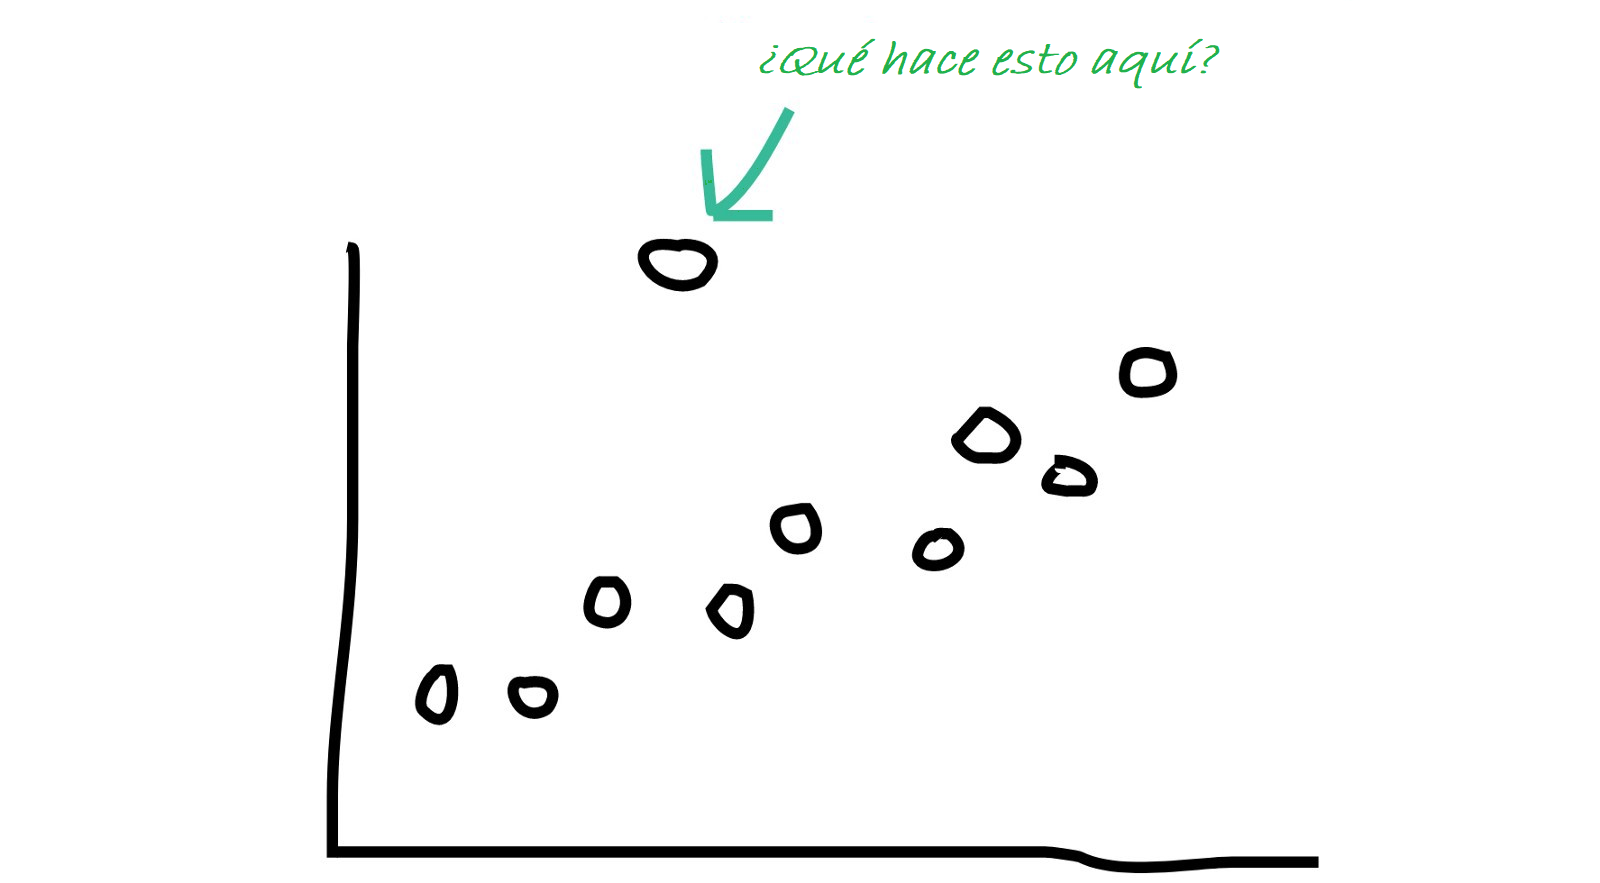

Pero para fijar ideas veamos un ejemplo en el que el set de datos tiene outliers arriba y abajo.

In [1]:
# Importamos librerías que vamos a usar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from scipy.stats.mstats import winsorize


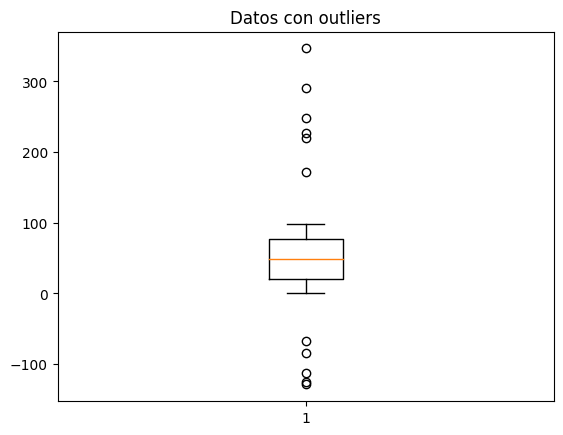

In [2]:
# Arreglo con 100 números aleatorios
array = [np.random.randint(100) for i in range(100)]

# Metiendo los outliers
# Los outliers se van agregando uno por uno asegurando que no se repitan
AlreadySelected = []
i = 0

# Creando 5 outliers en la parte baja del set de datos
while (i < 5):
	x = np.random.choice(array) # Selección aleatoria de un valor del arreglo
	y = x - np.mean(array)*3
	array = np.append(array, y)
	if (x not in AlreadySelected):
		AlreadySelected.append(y)

		i += 1

	else:
		continue

# Creando 5 outliers en la parte superior del conjunto de datos
i = 0
while (i < 5):
	x = np.random.choice(array) # Selección aleatoria de un valor del arreglo
	y = x + np.mean(array)*4 #obsérvese que aquí son muy atípicos
	array = np.append(array, y)
	if (x not in AlreadySelected):
		AlreadySelected.append(y)

		i += 1

	else:
		continue

std = np.std(array) # Guardamos la desviación estándar
mean = np.mean(array) # Guardamos la media

plt.boxplot(array)
plt.title('Datos con outliers')
plt.show()


In [3]:
# Miremos el valor de la media
print(mean)

52.12127254005992


Y hagamos el proceso de winzorizar a un 10% de los datos. Así, el proceso consiste en tomar 5% por arriba y 5% por abajo

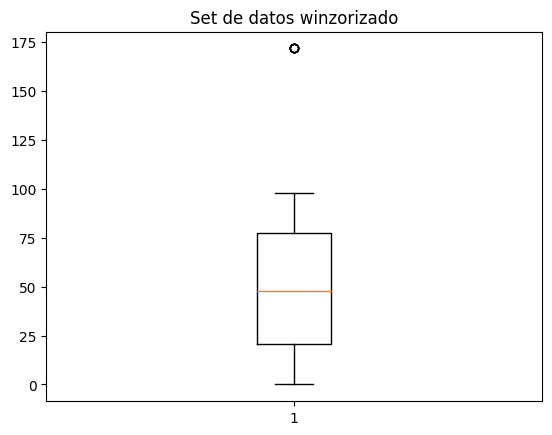

In [4]:
# Los parámetros empleados son: el set de datos y un vector con los umbrales
# en forma decimal
WinsorizedArray = winsorize(array,(0.05,0.05))

plt.boxplot(WinsorizedArray)
plt.title('Set de datos winzorizado')
plt.show()


Una vez hecho el proceso se puede obtener la media winzorizada.

In [5]:
WinsorizedMean = np.mean(WinsorizedArray)
print(WinsorizedMean)


52.52295983865545


En este caso claramente la mejoría es pequeña al calcular el valor de la media winzorizada. Sin embargo este cambio es más notorio cuando se tienen ouliers solo por aariba o por abajo.